In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/Jayappa_original.csv')
df.head()

,Unnamed: 0,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city
0,0,2017 Maruti Baleno 1.2 Alpha,₹ 5.45 Lakh,2017,1197 cc,Third Party insurance,Manual,"40,000 Kms",First Owner,Petrol,83.1bhp,5.0,21.4 kmpl,Hatchback,Agra
1,1,2018 Tata Hexa XTA,₹ 10 Lakh,2018,2179 cc,Third Party insurance,Automatic,"70,000 Kms",First Owner,Diesel,153.86bhp,7.0,17.6 kmpl,MUV,Agra
2,2,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
3,3,2015 Maruti Swift Dzire VXI,₹ 4.50 Lakh,2015,1197 cc,Third Party insurance,Manual,"70,000 Kms",Second Owner,Petrol,83.14bhp,5.0,20.85 kmpl,Sedan,Agra
4,4,2009 Hyundai i10 Magna 1.1,₹ 1.60 Lakh,2009,1086 cc,Third Party insurance,Manual,"80,000 Kms",First Owner,Petrol,68.05bhp,5.0,19.81 kmpl,Hatchback,Agra


In [5]:
df = df.drop(columns=['Unnamed: 0'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17446 entries, 0 to 17445
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          17446 non-null  object 
 1   resale_price       17446 non-null  object 
 2   registered_year    17377 non-null  object 
 3   engine_capacity    17432 non-null  object 
 4   insurance          17439 non-null  object 
 5   transmission_type  17446 non-null  object 
 6   kms_driven         17443 non-null  object 
 7   owner_type         17401 non-null  object 
 8   fuel_type          17446 non-null  object 
 9   max_power          17344 non-null  object 
 10  seats              17436 non-null  float64
 11  mileage            16938 non-null  object 
 12  body_type          17446 non-null  object 
 13  city               17446 non-null  object 
dtypes: float64(1), object(13)
memory usage: 1.9+ MB


**Data Quality Report for Continuous features**

In [7]:
continuous_cols = ['resale_price', 'engine_capacity', 'kms_driven', 'max_power', 'seats', 'mileage']

continuous_dqr = []

for col in continuous_cols:
    df[col] = df[col].astype(str).str.replace('[^\d.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

    continuous_dqr.append({
        'Feature': col,
        'Desc.': 'Continuous',
        'Count': df[col].count(),
        '% of Missing': round(df[col].isnull().mean() * 100, 2),
        'Card.': df[col].nunique(),
        'Min.': df[col].min(),
        'Q1': df[col].quantile(0.25),
        'Median': df[col].median(),
        'Q3': df[col].quantile(0.75),
        'Max.': df[col].max(),
        'Mean': df[col].mean(),
        'Std. Dev.': df[col].std(),
    })

continuous_dqr_df = pd.DataFrame(continuous_dqr)

columns_order = ['Feature', 'Desc.', 'Count', '% of Missing', 'Card.', 'Min.', 'Q1', 'Median', 'Q3', 'Max.', 'Mean', 'Std. Dev.']
continuous_dqr_df = continuous_dqr_df[columns_order]

print("Continuous Data Quality Report:")
print(continuous_dqr_df)

Continuous Data Quality Report:
           Feature       Desc.  Count  % of Missing  Card.   Min.        Q1  \
0     resale_price  Continuous  17446          0.00   1725    1.0      3.88   
1  engine_capacity  Continuous  17432          0.08    156    0.0   1197.00   
2       kms_driven  Continuous  17443          0.02   8285  286.0  31922.00   
3        max_power  Continuous  17344          0.58    545   25.4     78.90   
4            seats  Continuous  17436          0.06      9    2.0      5.00   
5          mileage  Continuous  16938          2.91    581    6.7     17.00   

     Median        Q3          Max.          Mean     Std. Dev.  
0      5.95      9.45  9.999900e+04  8.587724e+02  8.029858e+03  
1   1248.00   1498.00  5.998000e+03  1.423135e+03  4.746840e+02  
2  54817.00  79913.00  6.275000e+06  5.862822e+04  6.426464e+04  
3     88.50    120.00  1.324001e+10  1.515747e+06  1.061967e+08  
4      5.00      5.00  1.400000e+01  5.205494e+00  6.693209e-01  
5     18.90     21

**Data Quality Report for Categorical features**

In [8]:
categorical_cols = [col for col in df.columns if col not in continuous_cols]
categorical_dqr = []

for col in categorical_cols:

    categorical_dqr.append({
        'Feature': col,
        'Desc.': 'Categorical',
        'Count': df[col].count(),
        '% of Missing': round(df[col].isnull().mean() * 100, 2),
        'Card.': df[col].nunique(),
        'Mode': df[col].mode()[0] if not df[col].mode().empty else None,
        'Mode Freq.': df[col].value_counts().iloc[0] if not df[col].value_counts().empty else None,
        'Mode %': round((df[col].value_counts().iloc[0] / df.shape[0]) * 100, 2) if not df[col].value_counts().empty else None,
        '2nd Mode': df[col].value_counts().index[1] if len(df[col].value_counts()) > 1 else None,
        '2nd Mode Freq.': df[col].value_counts().iloc[1] if len(df[col].value_counts()) > 1 else None,
        '2nd Mode Perc': round((df[col].value_counts().iloc[1] / df.shape[0]) * 100, 2) if len(df[col].value_counts()) > 1 else None
    })
categorical_dqr_df = pd.DataFrame(categorical_dqr)
columns_order = ['Feature', 'Desc.', 'Count', '% of Missing', 'Card.', 'Mode', 'Mode Freq.', 'Mode %', '2nd Mode', '2nd Mode Freq.', '2nd Mode Perc']
categorical_dqr_df = categorical_dqr_df[columns_order]
print("\nCategorical Data Quality Report:")
print(categorical_dqr_df)


Categorical Data Quality Report:
             Feature        Desc.  Count  % of Missing  Card.  \
0          full_name  Categorical  17446          0.00   6923   
1    registered_year  Categorical  17377          0.40    243   
2          insurance  Categorical  17439          0.04      7   
3  transmission_type  Categorical  17446          0.00      2   
4         owner_type  Categorical  17401          0.26      5   
5          fuel_type  Categorical  17446          0.00      5   
6          body_type  Categorical  17446          0.00     26   
7               city  Categorical  17446          0.00     13   

                            Mode  Mode Freq.  Mode %  \
0  2016 Hyundai Grand i10 Sportz          51    0.29   
1                           2022         399    2.29   
2          Third Party insurance        7559   43.33   
3                         Manual       12541   71.88   
4                    First Owner       12293   70.46   
5                         Petrol       11336

**Missing Values and Outlier Analysis**

In [9]:
print("Missing Values Analysis:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_report = pd.DataFrame({
    'Feature': df.columns,
    'Missing Values': missing_values,
    '% Missing': missing_percentage
})
print(missing_report.sort_values(by='% Missing', ascending=False))

print("\nOutliers Analysis:")
continuous_cols = ['resale_price', 'engine_capacity', 'kms_driven', 'max_power', 'seats', 'mileage']

outliers_report = []

for col in continuous_cols:

    df[col] = pd.to_numeric(df[col], errors='coerce')
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outliers_report.append({
        'Feature': col,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outliers Count': len(outliers),
        'Outliers %': (len(outliers) / len(df)) * 100
    })

outliers_report_df = pd.DataFrame(outliers_report)
print(outliers_report_df)

missing_report.to_csv('missing_values_report.csv', index=False)
outliers_report_df.to_csv('outliers_report.csv', index=False)


Missing Values Analysis:
                             Feature  Missing Values  % Missing
mileage                      mileage             508   2.911842
max_power                  max_power             102   0.584661
registered_year      registered_year              69   0.395506
owner_type                owner_type              45   0.257939
engine_capacity      engine_capacity              14   0.080248
seats                          seats              10   0.057320
insurance                  insurance               7   0.040124
kms_driven                kms_driven               3   0.017196
full_name                  full_name               0   0.000000
resale_price            resale_price               0   0.000000
transmission_type  transmission_type               0   0.000000
fuel_type                  fuel_type               0   0.000000
body_type                  body_type               0   0.000000
city                            city               0   0.000000

Outliers Analy

**Box-Plot to visualize the Outliers**

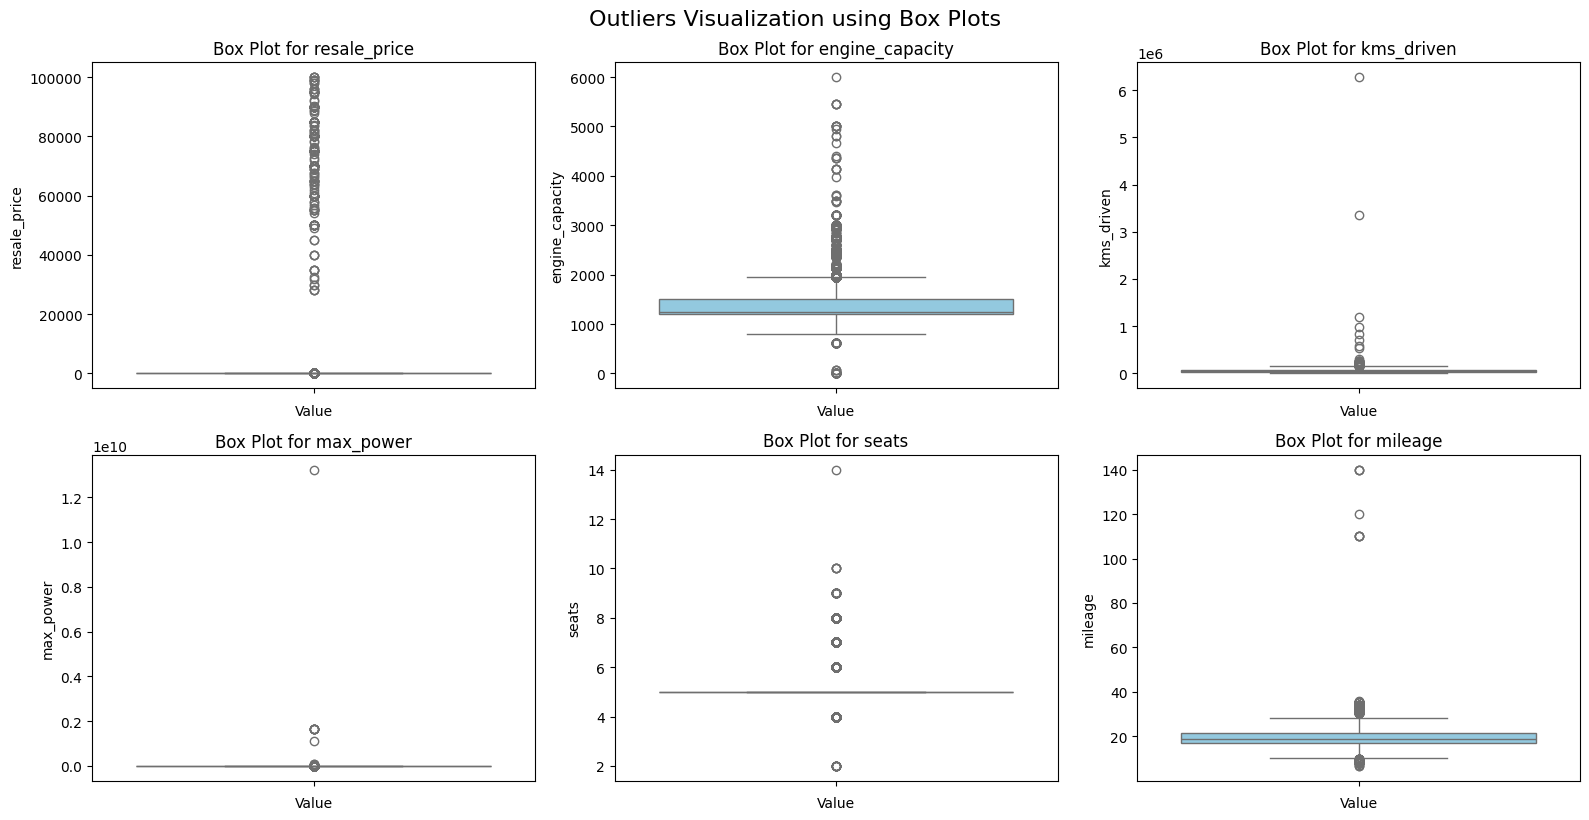

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))

for i, col in enumerate(continuous_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, y=col, color='skyblue')
    plt.title(f"Box Plot for {col}", fontsize=12)
    plt.ylabel(col, fontsize=10)
    plt.xlabel('Value', fontsize=10)
    plt.tight_layout()

plt.suptitle("Outliers Visualization using Box Plots", fontsize=16, y=1.02)
plt.show()


**Clamp Tranformation to handle outliers**

In [11]:
outlier_columns = ['resale_price', 'engine_capacity', 'kms_driven', 'max_power', 'seats', 'mileage']

def clamp_outliers(dataframe, columns):
    for col in columns:

        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        dataframe[col] = dataframe[col].clip(lower=lower_bound, upper=upper_bound)
    return dataframe

clamped_df = clamp_outliers(df.copy(), outlier_columns)

print(clamped_df[outlier_columns].head())


   resale_price  engine_capacity  kms_driven  max_power  seats  mileage
0          5.45           1197.0     40000.0      83.10    5.0    21.40
1         10.00           1949.5     70000.0     153.86    5.0    17.60
2          4.50           1197.0     70000.0      83.14    5.0    20.85
3          4.50           1197.0     70000.0      83.14    5.0    20.85
4          1.60           1086.0     80000.0      68.05    5.0    19.81


**Box-plot after handling the outliers**

<ipython-input-12-bb300fd60d23>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clamped_df, y=col, palette='pastel')
<ipython-input-12-bb300fd60d23>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clamped_df, y=col, palette='pastel')
<ipython-input-12-bb300fd60d23>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=clamped_df, y=col, palette='pastel')
<ipython-input-12-bb300fd60d23>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` a

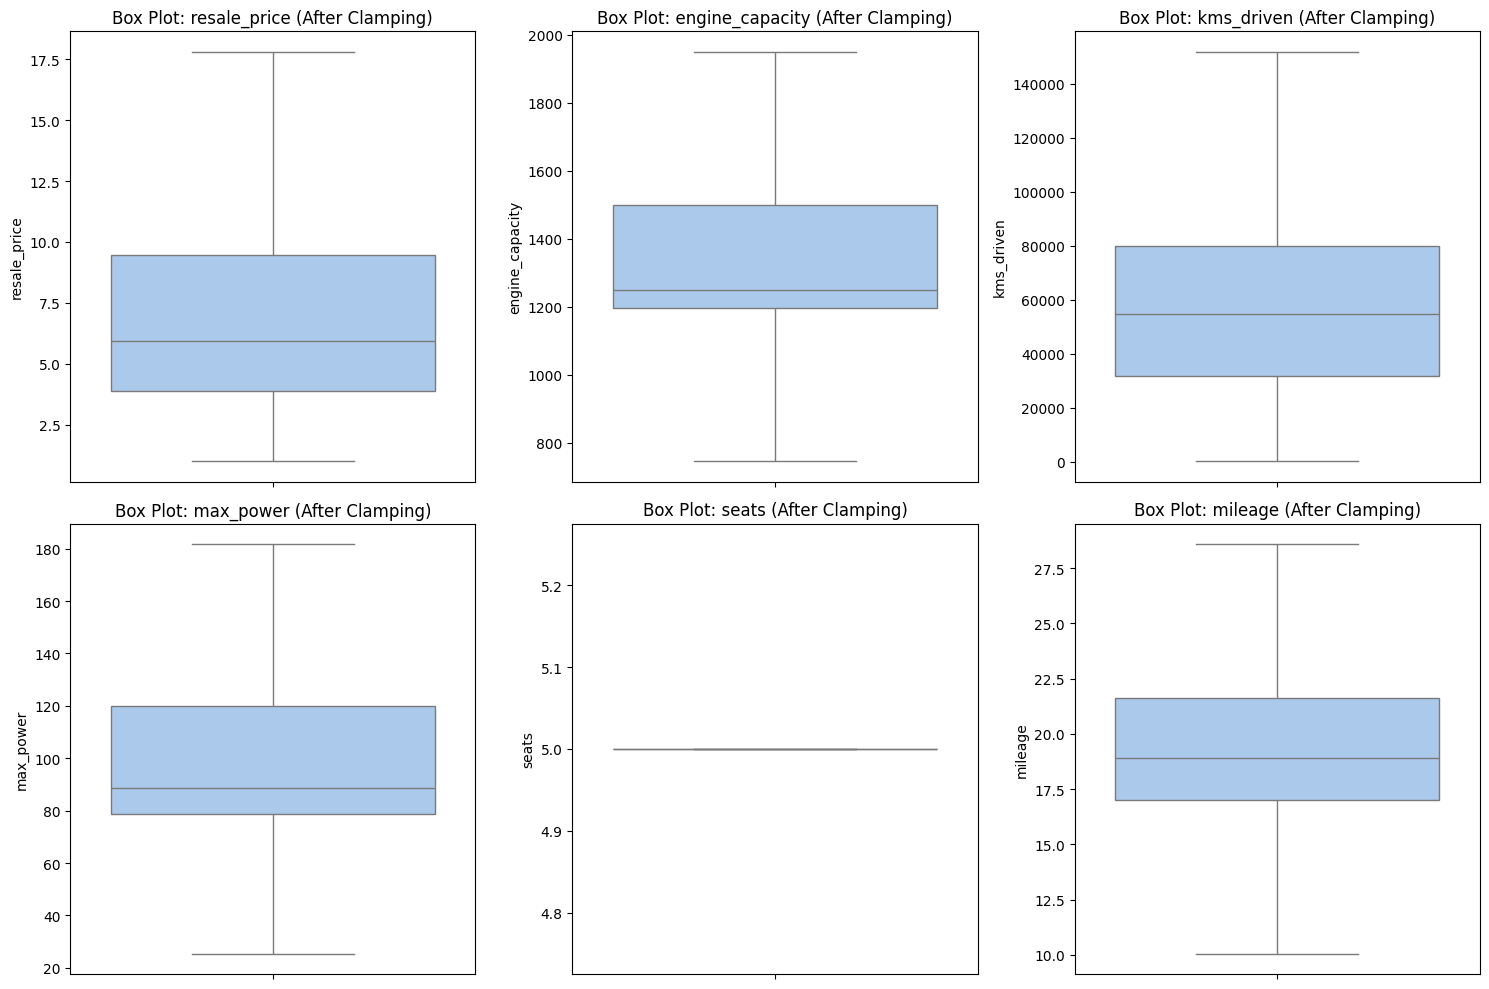

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

clamped_df = clamp_outliers(df.copy(), outlier_columns)

plt.figure(figsize=(15, 10))

for i, col in enumerate(outlier_columns, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=clamped_df, y=col, palette='pastel')
    plt.title(f'Box Plot: {col} (After Clamping)')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Handling Missing values**

In [13]:
columns_of_interest = missing_report['Feature'].tolist()

def handle_missing_values(dataframe):
    all_NaN_rows = dataframe[columns_of_interest].isna().all(axis=1)
    dataframe = dataframe[~all_NaN_rows]
    dataframe.fillna(0, inplace=True)

    return dataframe

cleaned_df = handle_missing_values(df.copy())
print(cleaned_df.head())

                      full_name  resale_price registered_year  \
0  2017 Maruti Baleno 1.2 Alpha          5.45            2017   
1            2018 Tata Hexa XTA         10.00            2018   
2   2015 Maruti Swift Dzire VXI          4.50            2015   
3   2015 Maruti Swift Dzire VXI          4.50            2015   
4    2009 Hyundai i10 Magna 1.1          1.60            2009   

   engine_capacity              insurance transmission_type  kms_driven  \
0           1197.0  Third Party insurance            Manual     40000.0   
1           2179.0  Third Party insurance         Automatic     70000.0   
2           1197.0  Third Party insurance            Manual     70000.0   
3           1197.0  Third Party insurance            Manual     70000.0   
4           1086.0  Third Party insurance            Manual     80000.0   

     owner_type fuel_type  max_power  seats  mileage  body_type  city  
0   First Owner    Petrol      83.10    5.0    21.40  Hatchback  Agra  
1   First Owne

In [14]:
#creating a new column named price_per_km
df['price_per_km'] = df['resale_price'] / df['kms_driven']
df.head()

,full_name,resale_price,registered_year,engine_capacity,insurance,transmission_type,kms_driven,owner_type,fuel_type,max_power,seats,mileage,body_type,city,price_per_km
0,2017 Maruti Baleno 1.2 Alpha,5.45,2017,1197.0,Third Party insurance,Manual,40000.0,First Owner,Petrol,83.10,5.0,21.40,Hatchback,Agra,0.000136
1,2018 Tata Hexa XTA,10.00,2018,2179.0,Third Party insurance,Automatic,70000.0,First Owner,Diesel,153.86,7.0,17.60,MUV,Agra,0.000143
2,2015 Maruti Swift Dzire VXI,4.50,2015,1197.0,Third Party insurance,Manual,70000.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,0.000064
3,2015 Maruti Swift Dzire VXI,4.50,2015,1197.0,Third Party insurance,Manual,70000.0,Second Owner,Petrol,83.14,5.0,20.85,Sedan,Agra,0.000064
4,2009 Hyundai i10 Magna 1.1,1.60,2009,1086.0,Third Party insurance,Manual,80000.0,First Owner,Petrol,68.05,5.0,19.81,Hatchback,Agra,0.000020


**Normalization**

In [15]:
cont_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

if 'Unnamed: 0' in cont_columns:
    cont_columns.remove('Unnamed: 0')

def min_max_normalize(series, new_min=10, new_max=100000):
    min_val = series.min()
    max_val = series.max()
    return new_min + ((series - min_val) / (max_val - min_val)) * (new_max - new_min)

def log_scale_normalize(series):
    safe_series = series.apply(lambda x: x if x > 0 else 0.0001)
    return np.log10(safe_series)

def z_scale_normalize(series):
    mean_val = series.mean()
    std_val = series.std()
    return (series - mean_val) / std_val

normalized_columns = {}

for column in cont_columns:
    minmax_normalized = min_max_normalize(df[column])
    log_normalized = log_scale_normalize(minmax_normalized)
    zscore_normalized = z_scale_normalize(log_normalized)
    normalized_columns[f"{column}_final_normalized"] = zscore_normalized

normalized_df = pd.DataFrame(normalized_columns)

normalized_df.head()


,resale_price_final_normalized,engine_capacity_final_normalized,kms_driven_final_normalized,max_power_final_normalized,seats_final_normalized,mileage_final_normalized,price_per_km_final_normalized
0,-0.223210,-0.127002,-0.210918,0.061397,-0.064809,0.236987,-0.214131
1,0.058373,0.682488,0.525570,0.061456,0.895264,0.140586,-0.205979
2,-0.293161,-0.127002,0.525570,0.061397,-0.064809,0.224694,-0.306659
3,-0.293161,-0.127002,0.525570,0.061397,-0.064809,0.224694,-0.306659
4,-0.541916,-0.258487,0.701650,0.061384,-0.064809,0.200087,-0.367319


In [16]:
df.to_csv('preprocessed_data.csv', index=False)

**Distribution of Engine Capacity**

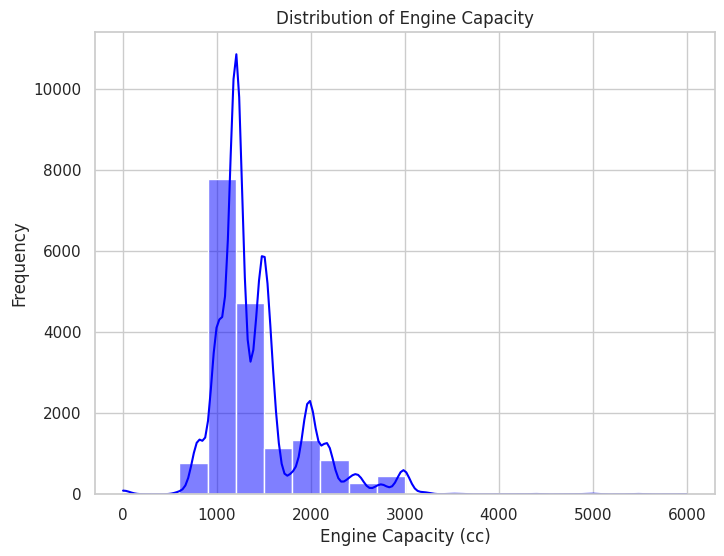

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.histplot(df['engine_capacity'],bins=20, kde=True, color='blue')
plt.title('Distribution of Engine Capacity')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Frequency')
plt.show()

In [18]:
df['log_resale_price'] = np.log10(df['resale_price'].apply(lambda x: x if x > 0 else 0.0001))



<ipython-input-19-01bfa41a790a>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='log_resale_price', y='body_type', palette='viridis', ci=None)
<ipython-input-19-01bfa41a790a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='log_resale_price', y='body_type', palette='viridis', ci=None)


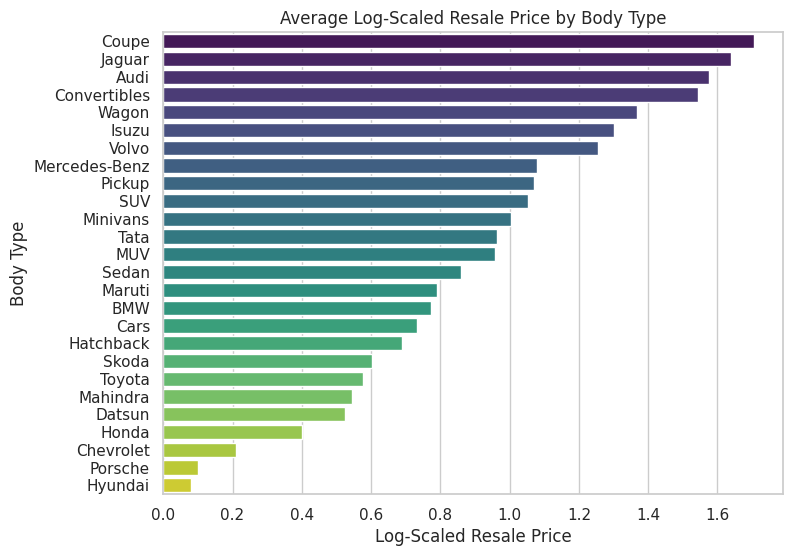

In [19]:
# Calculate mean log-scaled resale price by body type and sort in descending order
mean_log_resale_price = df.groupby('body_type')['log_resale_price'].mean().sort_values(ascending=False)

# Set 'body_type' as a categorical variable with the sorted order
df['body_type'] = pd.Categorical(df['body_type'], categories=mean_log_resale_price.index, ordered=True)

# Plot bar chart with the correct order
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='log_resale_price', y='body_type', palette='viridis', ci=None)
plt.title('Average Log-Scaled Resale Price by Body Type')
plt.xlabel('Log-Scaled Resale Price')
plt.ylabel('Body Type')
plt.show()


<ipython-input-20-5417087e987f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=clamped_df, y='owner_type', palette='muted', orient='h')


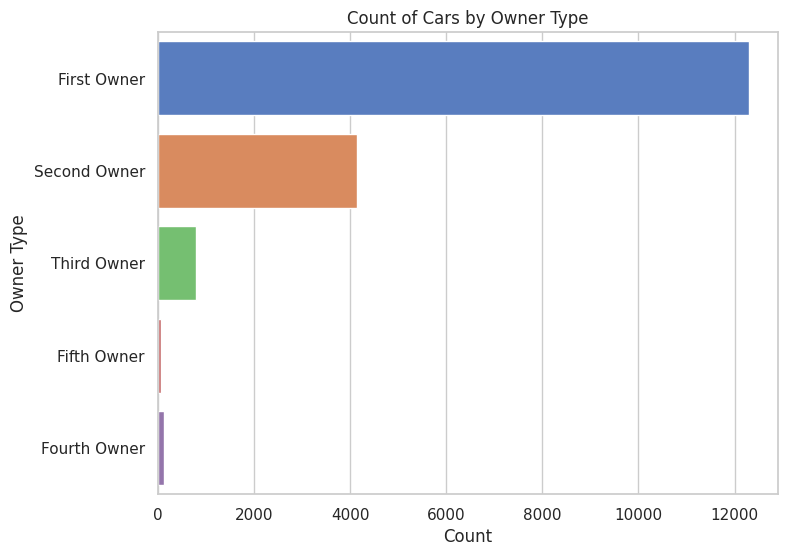

In [20]:
# Bar plot for cars by owner types
plt.figure(figsize=(8, 6))
sns.countplot(data=clamped_df, y='owner_type', palette='muted', orient='h')
plt.title('Count of Cars by Owner Type')
plt.xlabel('Count')
plt.ylabel('Owner Type')
plt.show()